In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram


In [2]:
df = pd.read_csv("../../breast-cancer-clustering.csv")

In [3]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 30)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
scaler = StandardScaler()

In [7]:
scaled_df = scaler.fit_transform(df)

In [8]:
model = AgglomerativeClustering()

In [9]:
cluster_labels = model.fit_predict(scaled_df)

In [10]:
df['labels'] = cluster_labels

In [11]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
sil_scores = []
dav_scores = []
cal_scores = []
for i in range(2,10):   
    model = AgglomerativeClustering(n_clusters=i,linkage='single')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))

    model = AgglomerativeClustering(n_clusters=i,linkage='complete')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


    model = AgglomerativeClustering(n_clusters=i,linkage='average')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


    model = AgglomerativeClustering(n_clusters=i,linkage='ward')
    cluster_labels = model.fit_predict(scaled_df)
    df['labels'] = cluster_labels
    sil_scores.append(silhouette_score(scaled_df,cluster_labels))
    dav_scores.append(davies_bouldin_score(scaled_df,cluster_labels))
    cal_scores.append(calinski_harabasz_score(scaled_df,cluster_labels))


In [13]:
print(F"Best Silhoutte Scores : {max(sil_scores)} ")
print(F"Best Davies Bouldin Scores : {max(dav_scores)} ")
print(F"Best Calinski Harabasz Scores : {max(cal_scores)} ")

Best Silhoutte Scores : 0.6606668813897673 
Best Davies Bouldin Scores : 2.043142596143826 
Best Calinski Harabasz Scores : 248.62884061078898 


In [14]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

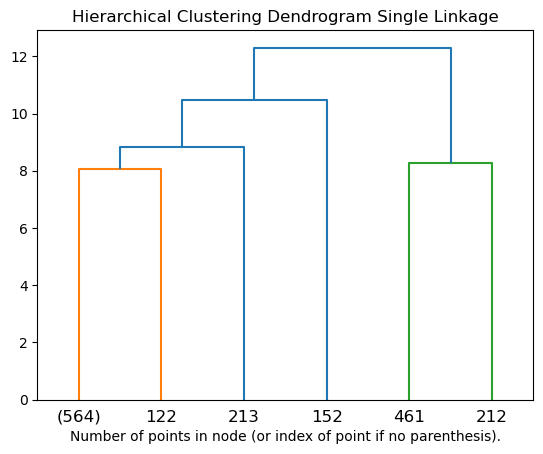

In [15]:
model = AgglomerativeClustering(linkage='single',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Single Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

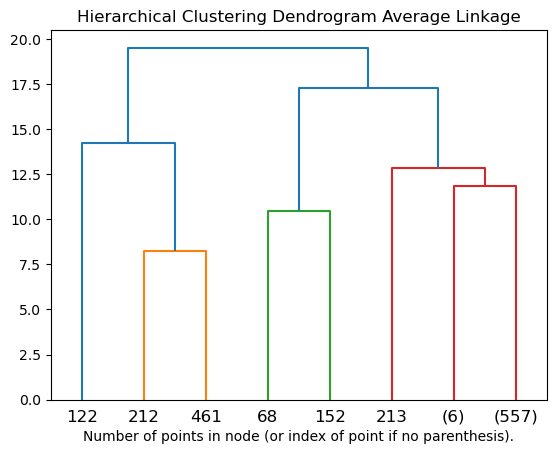

In [16]:
model = AgglomerativeClustering(linkage='average',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Average Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

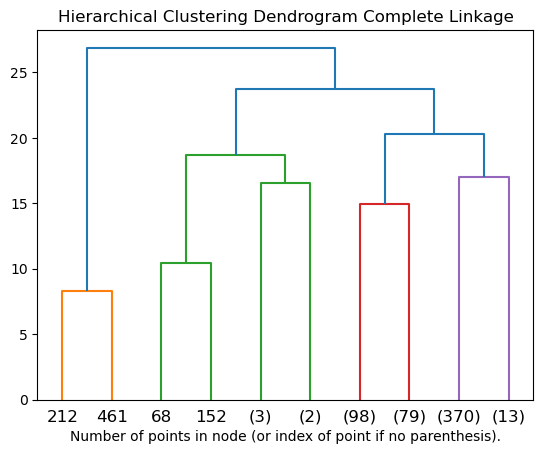

In [17]:
model = AgglomerativeClustering(linkage='complete',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Complete Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

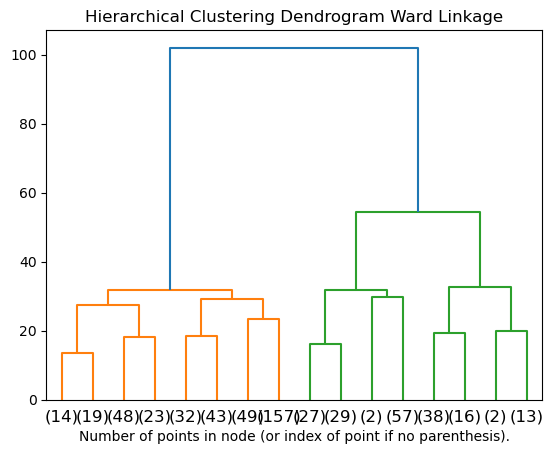

In [18]:
model = AgglomerativeClustering(linkage='ward',compute_distances=True)
model.fit(scaled_df)

plt.title("Hierarchical Clustering Dendrogram Ward Linkage")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()